# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/appl_1980_2014.csv)

In [3]:
url = "https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/appl_1980_2014.csv"
apple = pd.read_csv(url)

### Step 3. Assign it to a variable apple

In [4]:
print(apple.head())


         Date   Open   High    Low  Close    Volume  Adj Close
0  2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
1  2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2  2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
3  2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
4  2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52


### Step 4.  Check out the type of the columns

In [5]:
print(apple.dtypes)


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


### Step 5. Transform the Date column as a datetime type

In [6]:
apple['Date'] = pd.to_datetime(apple['Date'])


### Step 6.  Set the date as the index

In [7]:
apple.set_index('Date', inplace=True)
print("Dataset sau khi đặt 'Date' làm index:\n", apple.head())

Dataset sau khi đặt 'Date' làm index:
              Open   High    Low  Close    Volume  Adj Close
Date                                                       
2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52


### Step 7.  Is there any duplicate dates?

In [8]:
print("Có ngày trùng lặp không?", apple.index.duplicated().any())


Có ngày trùng lặp không? False


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [9]:
apple.sort_index(inplace=True)
print("Dataset sau khi sắp xếp theo ngày:\n", apple.head())

Dataset sau khi sắp xếp theo ngày:
              Open   High    Low  Close     Volume  Adj Close
Date                                                        
1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45
1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41


### Step 9. Get the last business day of each month

In [10]:
last_business_day = apple.resample('M').last()
print("Ngày giao dịch cuối cùng của mỗi tháng:\n", last_business_day.head())

Ngày giao dịch cuối cùng của mỗi tháng:
              Open   High    Low  Close    Volume  Adj Close
Date                                                       
1980-12-31  34.25  34.25  34.13  34.13   8937600       0.53
1981-01-31  28.50  28.50  28.25  28.25  11547200       0.44
1981-02-28  26.50  26.75  26.50  26.50   3690400       0.41
1981-03-31  24.75  24.75  24.50  24.50   3998400       0.38
1981-04-30  28.38  28.62  28.38  28.38   3152800       0.44


<ipython-input-10-5e11404aee4a>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_business_day = apple.resample('M').last()


### Step 10.  What is the difference in days between the first day and the oldest

In [11]:
date_diff = (apple.index.max() - apple.index.min()).days
print(f"Số ngày giữa ngày đầu tiên và ngày cuối cùng: {date_diff} ngày")

Số ngày giữa ngày đầu tiên và ngày cuối cùng: 12261 ngày


### Step 11.  How many months in the data we have?

In [12]:
num_months = apple.resample('M').size().shape[0]
print(f"Số tháng có trong dữ liệu: {num_months}")

Số tháng có trong dữ liệu: 404


<ipython-input-12-ac1e041d4605>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  num_months = apple.resample('M').size().shape[0]


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

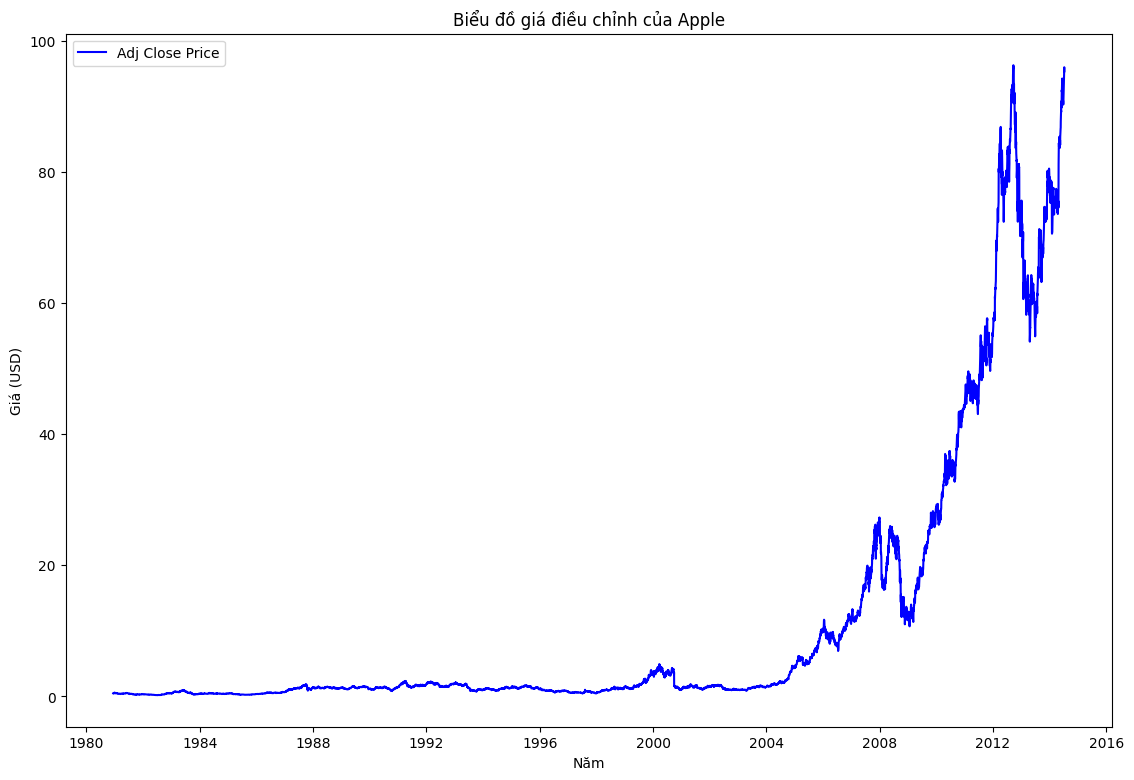

In [13]:
plt.figure(figsize=(13.5, 9))
plt.plot(apple['Adj Close'], label='Adj Close Price', color='blue')
plt.title('Biểu đồ giá điều chỉnh của Apple')
plt.xlabel('Năm')
plt.ylabel('Giá (USD)')
plt.legend()
plt.show()

### BONUS: Create your own question and answer it.